Video Link : https://www.youtube.com/watch?v=i_LwzRVP7bg&t=89s

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

DataSet : https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


#Readying the data

In [ ]:
col_names = ["flength","fwidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
# pd.read_csv will make a dataframe object out of the csv, setting a names attribute will give coloumn
# headers
df = pd.read_csv("magic04.data", names = col_names)

FileNotFoundError: ignored

In [ ]:
df.head()

All values except class are called features based on which we will predict the result which is the class coloumn. To determie whether it is a gamma particle or a hadron.

In [ ]:
#Checking unique values in class coloumn in df
df["class"].unique()

In [ ]:
#Changing class values such that g = 1 and h = 0
df["class"] = (df["class"] == "g").astype(int)
df["class"].unique()

Each row is one sample or an example or a data point
The goal now is to use the features to predict for future samples which class (lable) it is (g or h).
This is called classification.
This is supervised learning


In [ ]:
#Plotting histograms for each feature
#Density keyword is used to normalize the histogram

for label in col_names[:-1]:#Choosing labels upto last item : So only features
  plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'Gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = 'red', label = 'Hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validate, Test Datasets

In [ ]:
#df.sample(frac - 1) is to shuffle the data
#then split data into 0-60%, then 60 to 80% and then 80-100%
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)) , int(0.8*len(df))])


NameError: ignored

In [ ]:
#We can see that the data values for different features have different ranges so we need to scale them
#We also have more data for gamma than hadron so we must over-sample done using an import
def scale_dataset(dataframe, oversample = False ):  #default value
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample :
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y) #Take more of the class with less data samples and keep sampling them

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, Xtrain, ytrain = scale_dataset(train, True)

#Now all values for all features are in the same range and we have equal samples for g and h

In [ ]:
valid, Xvalid, yvalid = scale_dataset(valid, False)
test, Xtest, ytest = scale_dataset(test, False)

#No over_sampling for the test and validation data because they should be real-world like and not ideal

#Models for Classification

Now Data is properly formatted. Time to learn and use models now

##kNN

In [ ]:
#We will use sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
#Checking using only 1 neighbour
knnModel = KNeighborsClassifier(n_neighbors = 1)
knnModel.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
ypred = knnModel.predict(Xtest)
ypred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
ytest

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1374
           1       0.83      0.91      0.87      2430

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Accuracy = 80 percent which is pretty good.

Precision = PredictedPositive/TrulyPositive

Recall = PredictedPositive/TotalPositivesInDataSet

f1 is combination of P&R (Better to look at since data is not balanced)

In [ ]:
#Now using 3 neighbours
knnModelN = KNeighborsClassifier(n_neighbors = 3)
knnModelN.fit(Xtrain,ytrain)
ypredN = knnModelN.predict(Xtest)
print(classification_report(ytest,ypredN))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1374
           1       0.83      0.91      0.87      2430

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Around 80ish percent for any value of K. Which is pretty good for such a simple model.

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbModel = GaussianNB()
nbModel = nbModel.fit(Xtrain,ytrain)

In [ ]:
ypredNB = nbModel.predict(Xtest)
print(classification_report(ytest,ypredNB))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1374
           1       0.83      0.91      0.87      2430

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Not too good. Not too bad


##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#There can be more parameters to pass here. If you want to use this do research
lrModel = LogisticRegression()
lrModel = lrModel.fit(Xtrain,ytrain)
ypredLR = lrModel.predict(Xtest)
print(classification_report(ytest,ypredLR))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1374
           1       0.84      0.84      0.84      2430

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



This is also okok only

##Support Vectore Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
svModel = SVC()  #SupportVectorClassifier (Again a lot of parameters to change for a prod level model)
svModel = svModel.fit(Xtrain,ytrain)
ypredSV = svModel.predict(Xtest)
print(classification_report(ytest,ypredSV))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1374
           1       0.89      0.92      0.91      2430

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Nice. Very Nice


##Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
#Creating a sequential neural network
nnModel = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid') #Projecting our prediction to be 0 or 1
])

nnModel.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
#Epoch is number of times we retrain
#batch size is
#validation split says 0.2 = 20% data will be used as validation set rest as training set
history = nnModel.fit(Xtrain,ytrain, epochs = 100, batch_size = 32, validation_split=0.2, verbose = 0)

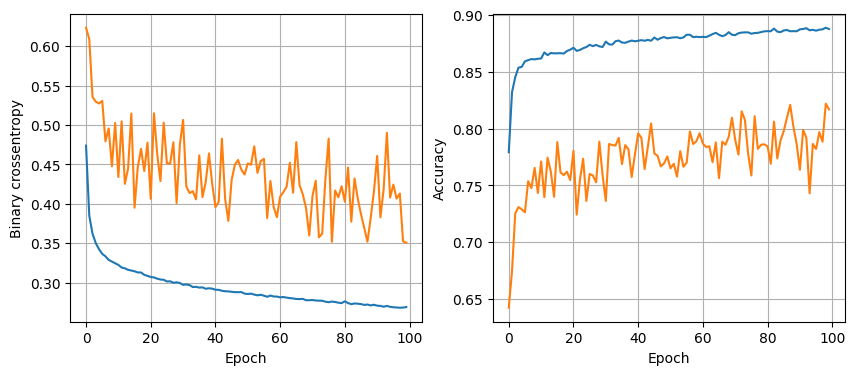

In [ ]:
plot_history(history)

In [ ]:
#Creating a function for NN Model for performing a grid search : Best set of parameters

def train_model(Xtrain,ytrain, num_nodes, dropout_prob, learning_rate, batch_size, epochs ):

  nnModel = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation = 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation = 'sigmoid') #Projecting our prediction to be 0 or 1
  ])

  nnModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])

  history = nnModel.fit(Xtrain,ytrain, epochs = epochs, batch_size = batch_size, validation_split=0.2, verbose = 0)

  return nnModel, history


16 nodes, 0 dropout probability, lr 0.01, batch size 32


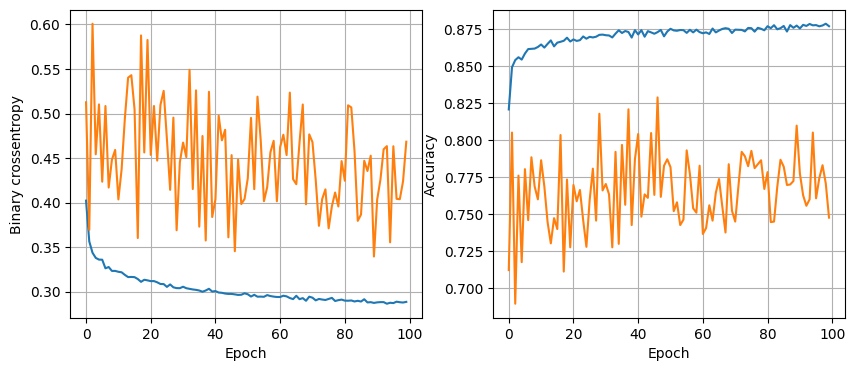

119/119 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8680
16 nodes, 0 dropout probability, lr 0.01, batch size 64


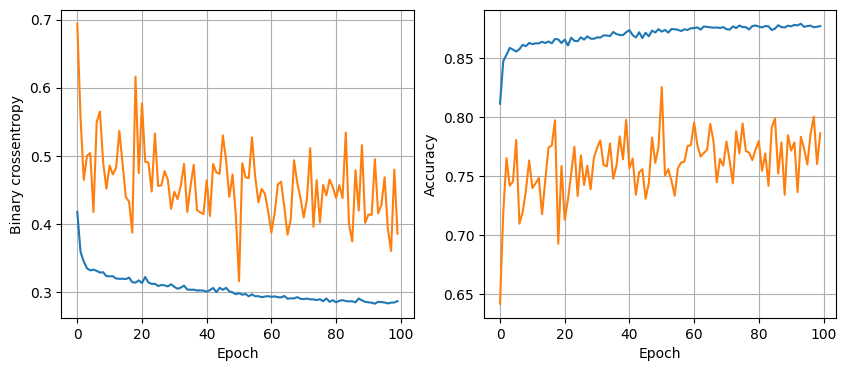

119/119 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8659
16 nodes, 0 dropout probability, lr 0.01, batch size 128


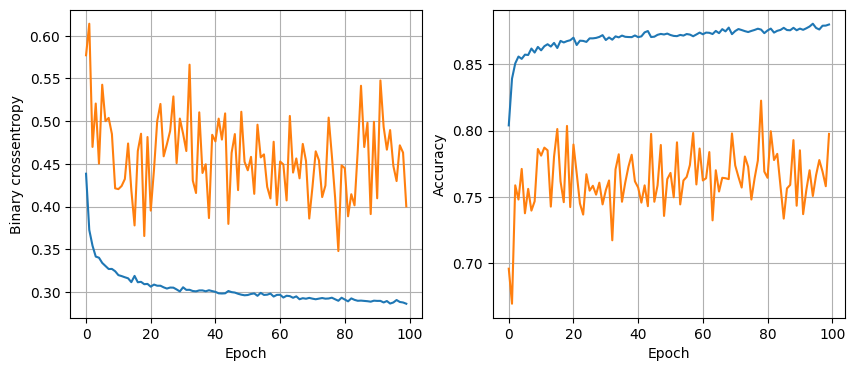

119/119 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8612
16 nodes, 0 dropout probability, lr 0.005, batch size 32


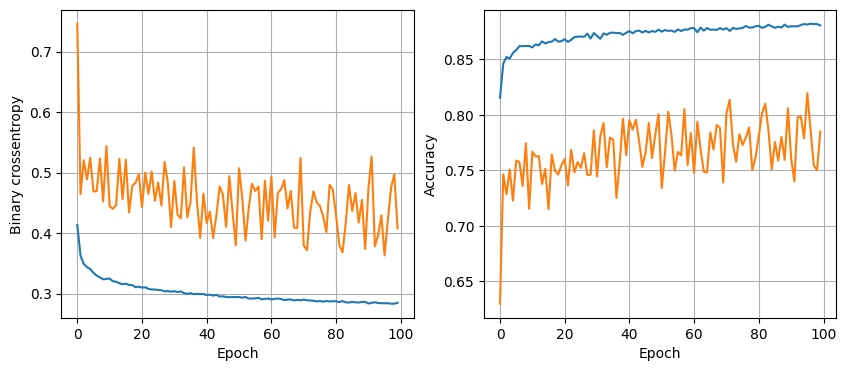

119/119 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8715
16 nodes, 0 dropout probability, lr 0.005, batch size 64


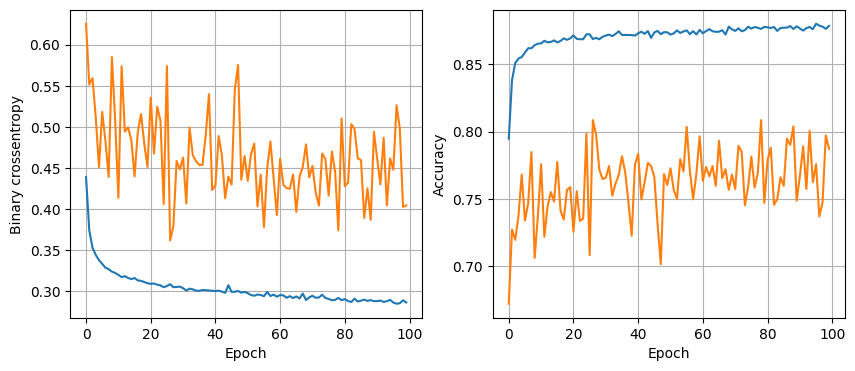

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8741
16 nodes, 0 dropout probability, lr 0.005, batch size 128


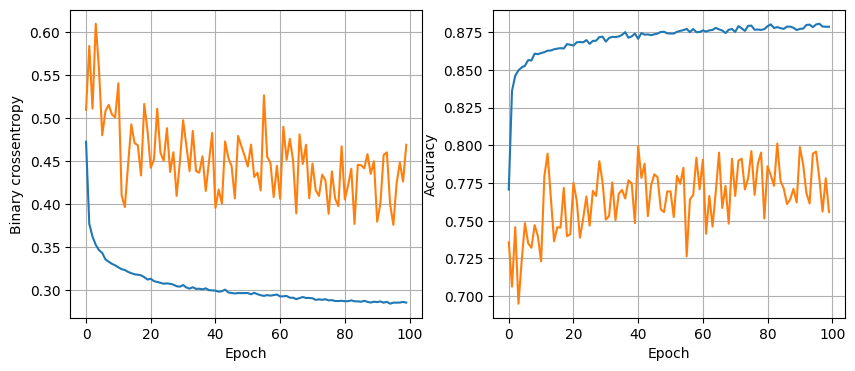

119/119 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8704
16 nodes, 0 dropout probability, lr 0.001, batch size 32


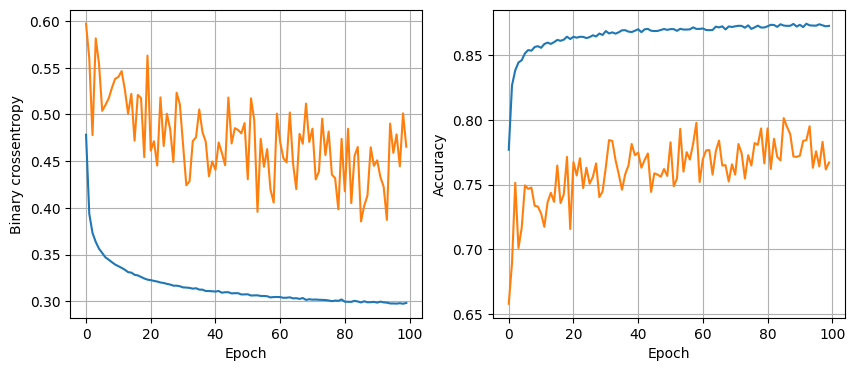

119/119 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8696
16 nodes, 0 dropout probability, lr 0.001, batch size 64


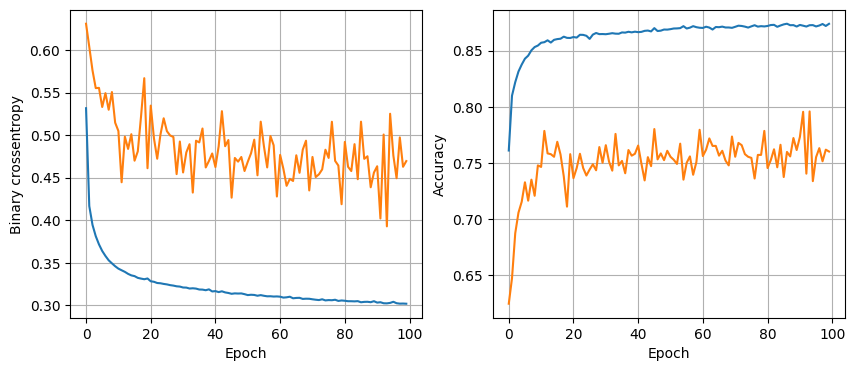

119/119 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8696
16 nodes, 0 dropout probability, lr 0.001, batch size 128


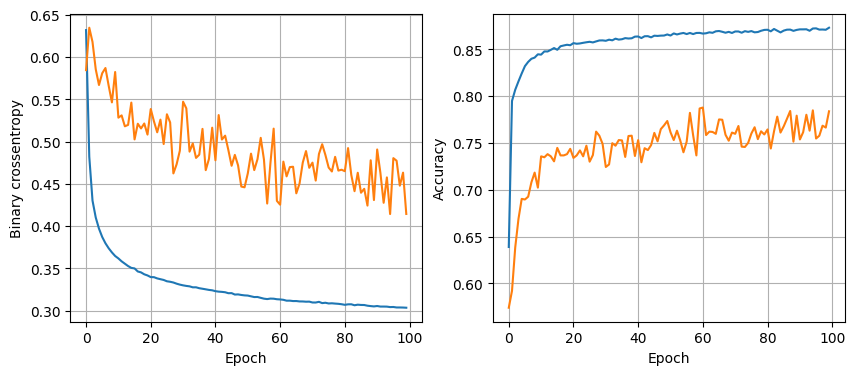

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8688
16 nodes, 0.2 dropout probability, lr 0.01, batch size 32


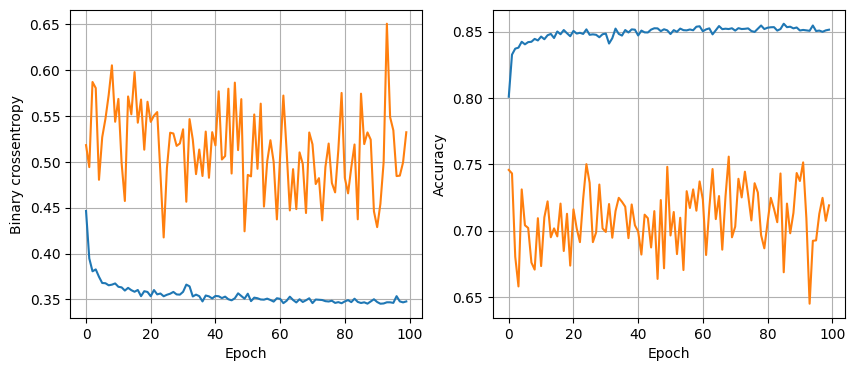

119/119 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8628
16 nodes, 0.2 dropout probability, lr 0.01, batch size 64


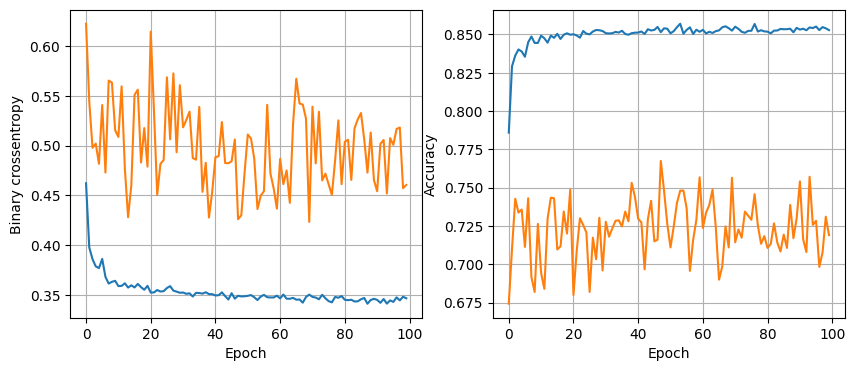

119/119 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8693
16 nodes, 0.2 dropout probability, lr 0.01, batch size 128


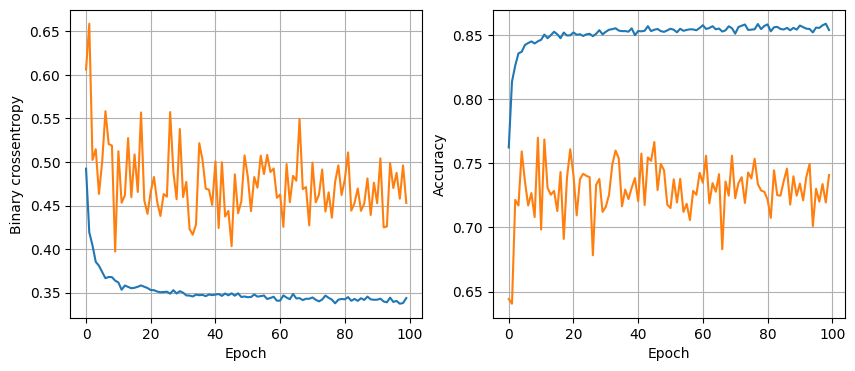

119/119 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8712
16 nodes, 0.2 dropout probability, lr 0.005, batch size 32


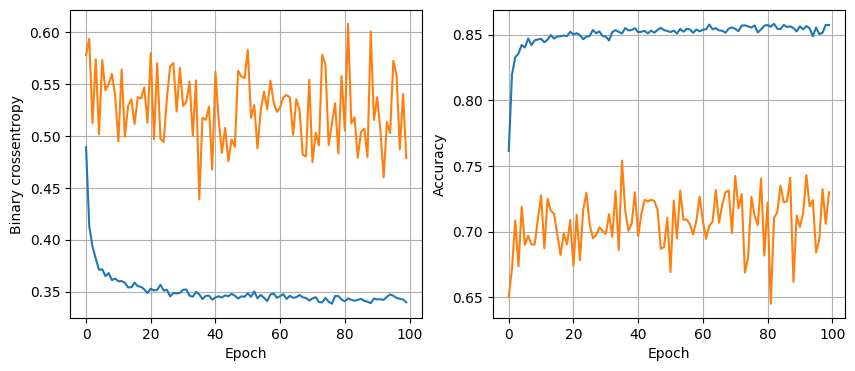

119/119 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8686
16 nodes, 0.2 dropout probability, lr 0.005, batch size 64


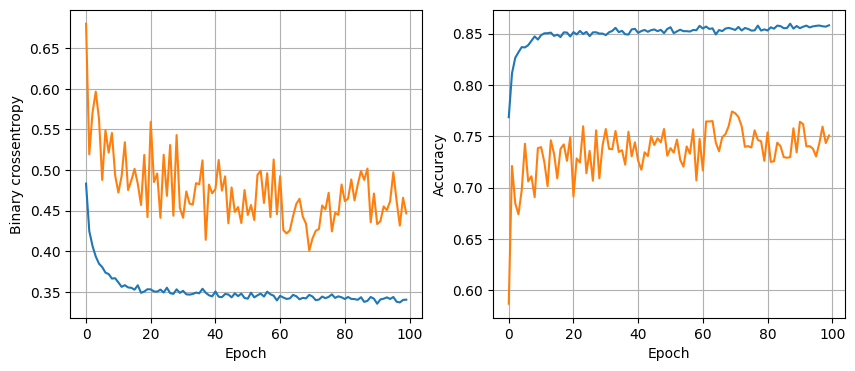

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8675
16 nodes, 0.2 dropout probability, lr 0.005, batch size 128


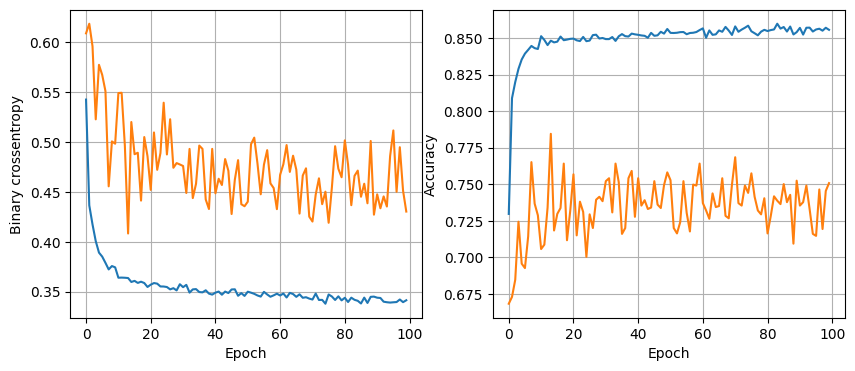

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8662
16 nodes, 0.2 dropout probability, lr 0.001, batch size 32


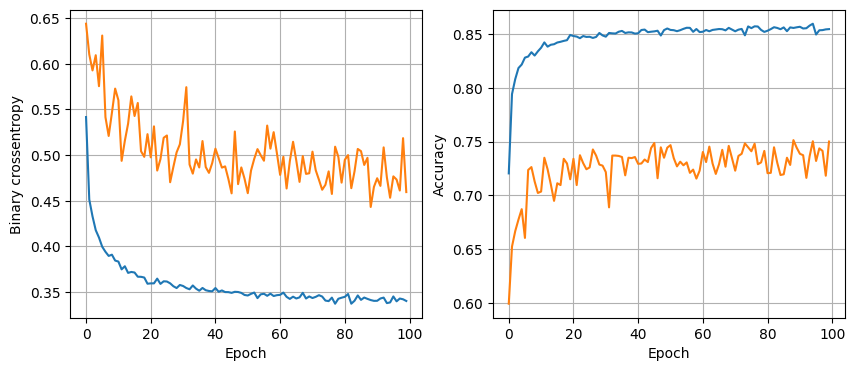

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8662
16 nodes, 0.2 dropout probability, lr 0.001, batch size 64


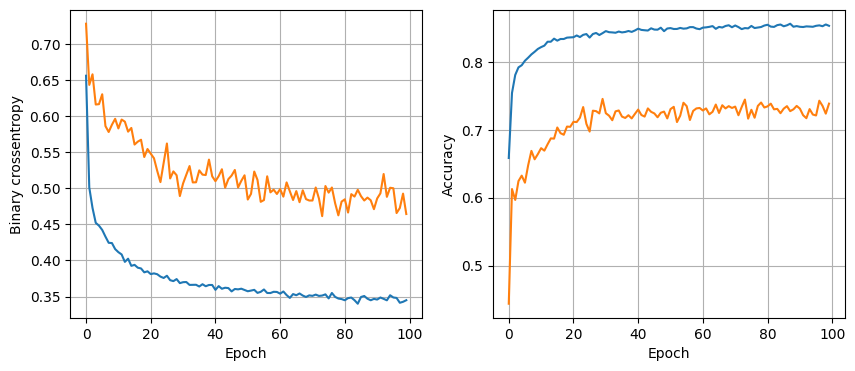

119/119 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8675
16 nodes, 0.2 dropout probability, lr 0.001, batch size 128


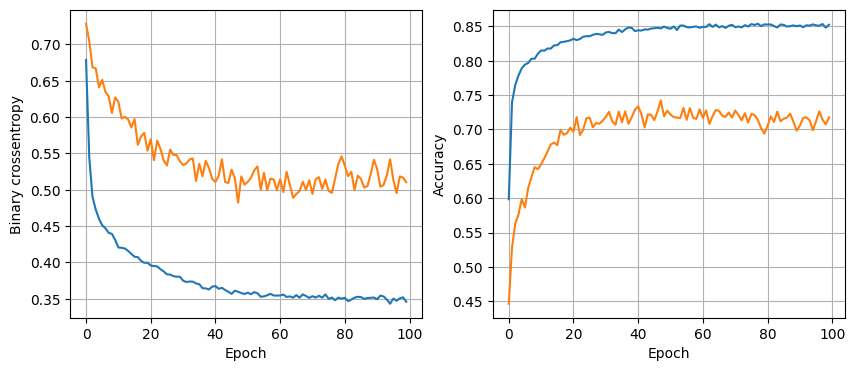

119/119 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8672
32 nodes, 0 dropout probability, lr 0.01, batch size 32


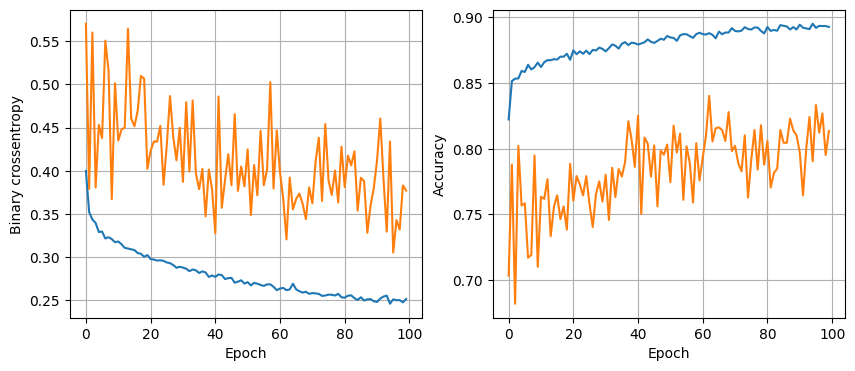

119/119 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8688
32 nodes, 0 dropout probability, lr 0.01, batch size 64


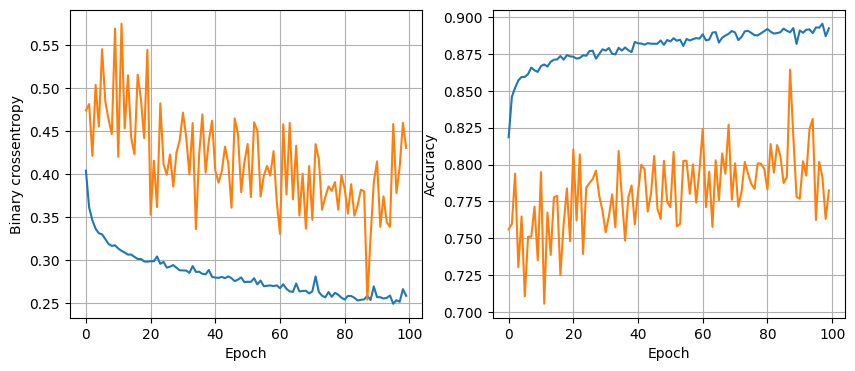

119/119 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8667
32 nodes, 0 dropout probability, lr 0.01, batch size 128


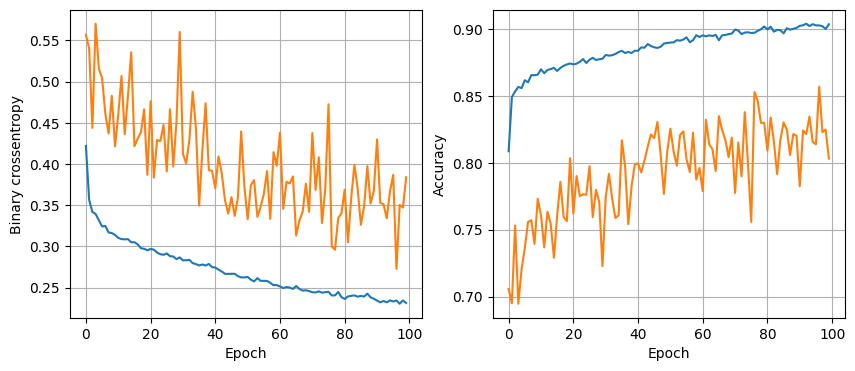

119/119 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8699
32 nodes, 0 dropout probability, lr 0.005, batch size 32


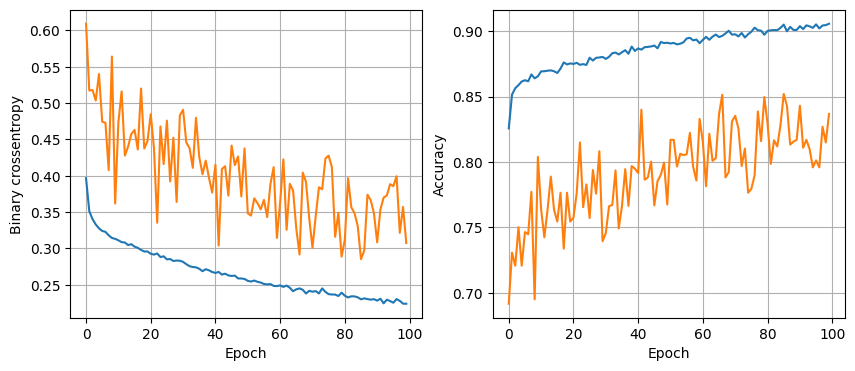

119/119 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8544
32 nodes, 0 dropout probability, lr 0.005, batch size 64


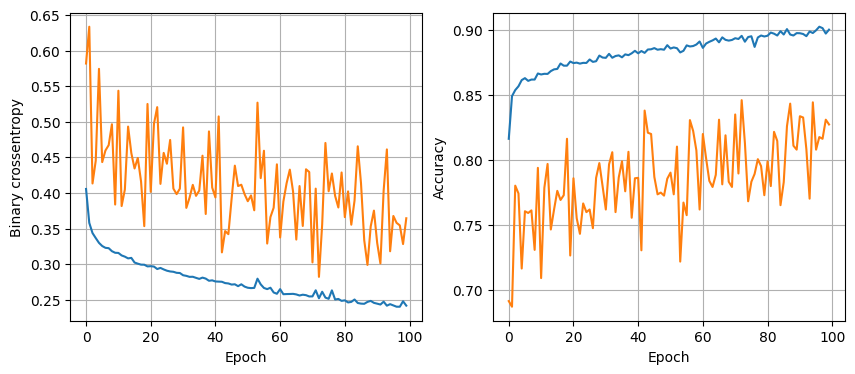

119/119 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8599
32 nodes, 0 dropout probability, lr 0.005, batch size 128


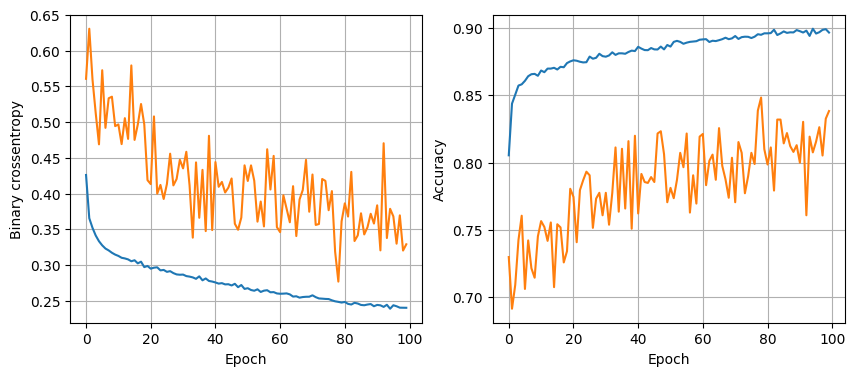

119/119 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8607
32 nodes, 0 dropout probability, lr 0.001, batch size 32


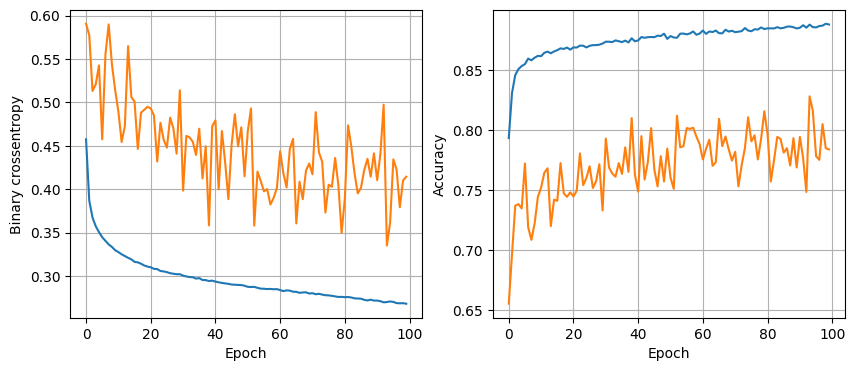

119/119 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8680
32 nodes, 0 dropout probability, lr 0.001, batch size 64


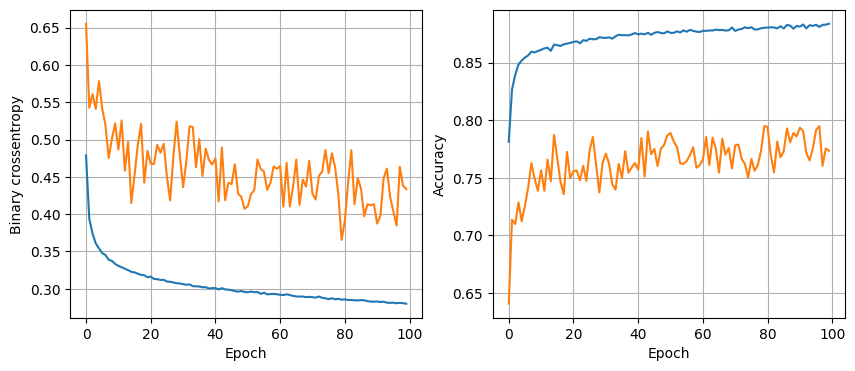

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8670
32 nodes, 0 dropout probability, lr 0.001, batch size 128


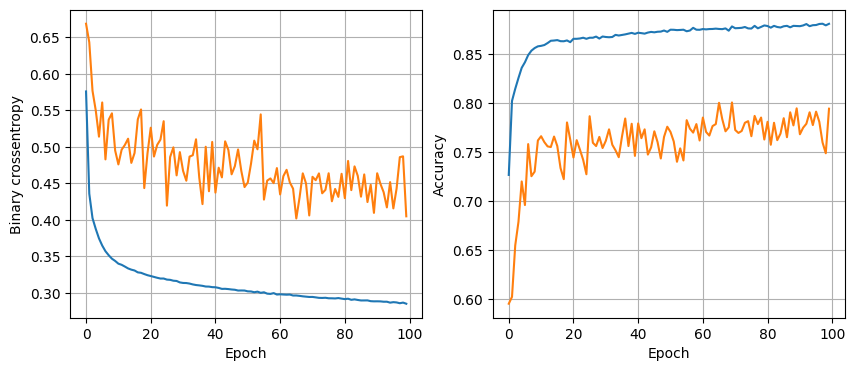

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8715
32 nodes, 0.2 dropout probability, lr 0.01, batch size 32


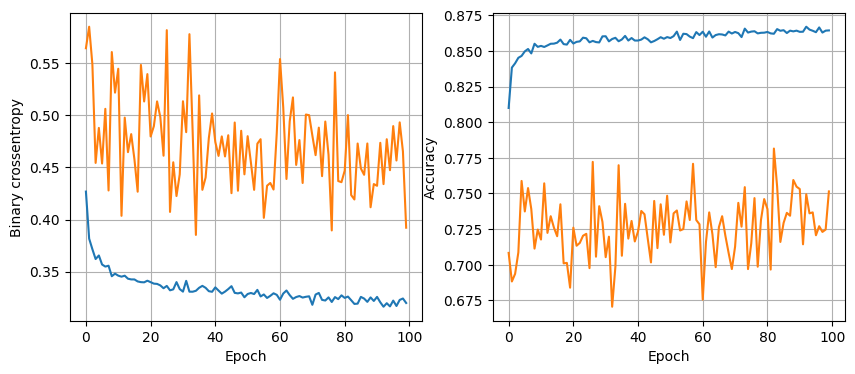

119/119 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8699
32 nodes, 0.2 dropout probability, lr 0.01, batch size 64


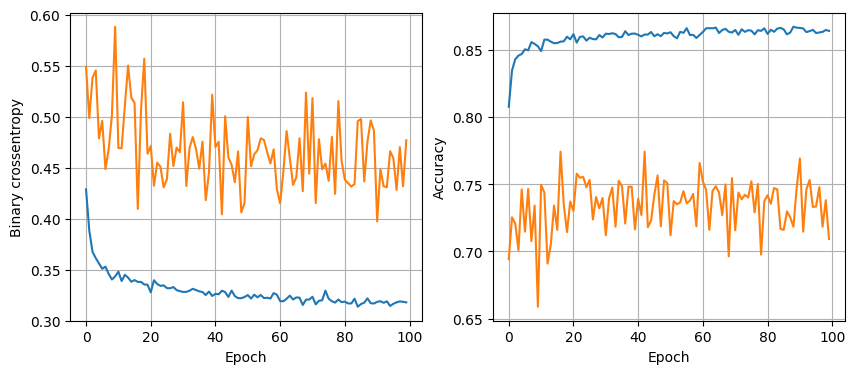

119/119 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8701
32 nodes, 0.2 dropout probability, lr 0.01, batch size 128


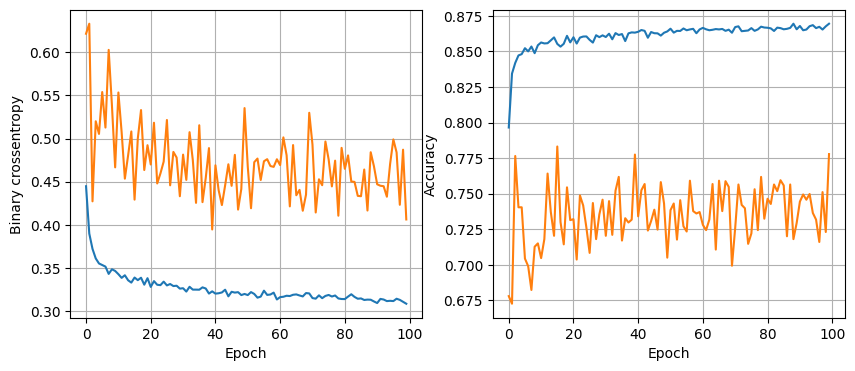

119/119 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8788
32 nodes, 0.2 dropout probability, lr 0.005, batch size 32


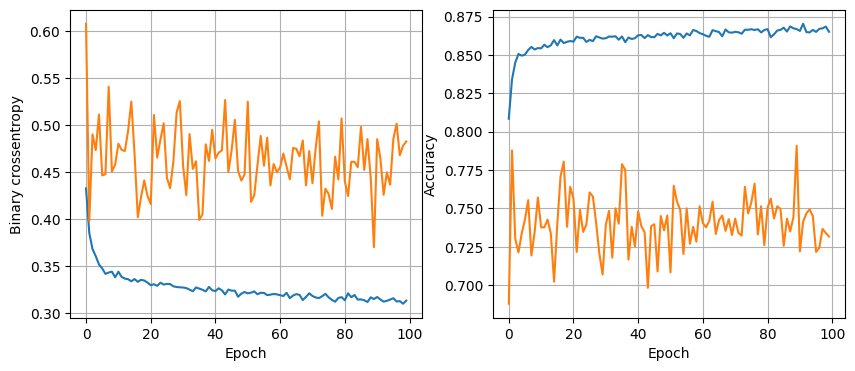

119/119 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8741
32 nodes, 0.2 dropout probability, lr 0.005, batch size 64


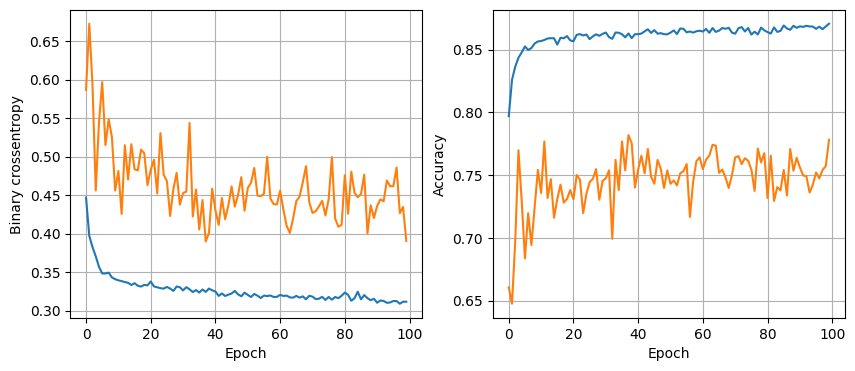

119/119 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8728
32 nodes, 0.2 dropout probability, lr 0.005, batch size 128


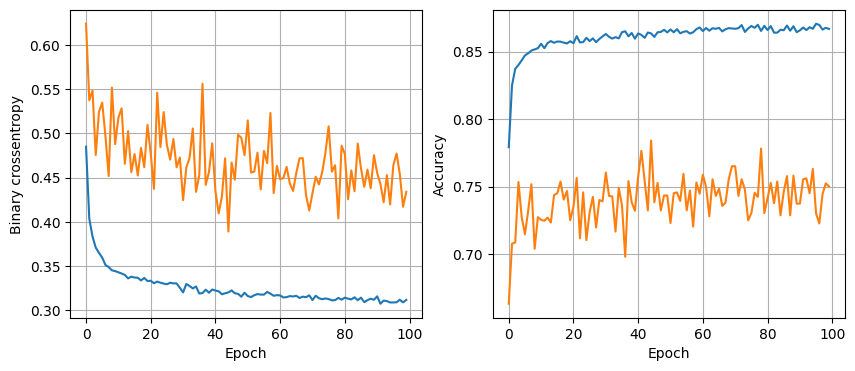

119/119 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8683
32 nodes, 0.2 dropout probability, lr 0.001, batch size 32


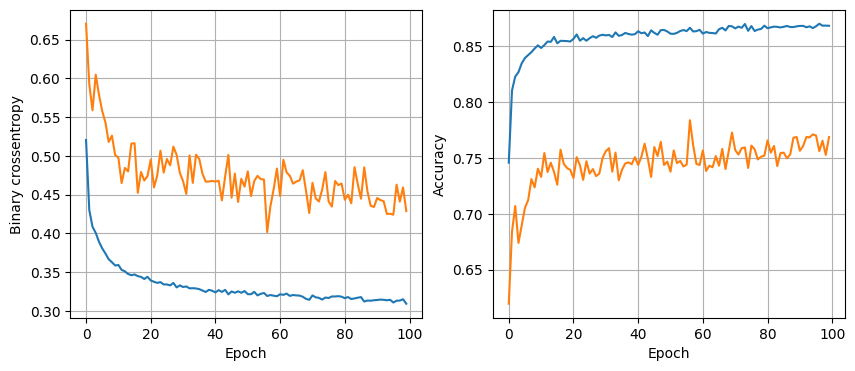

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8746
32 nodes, 0.2 dropout probability, lr 0.001, batch size 64


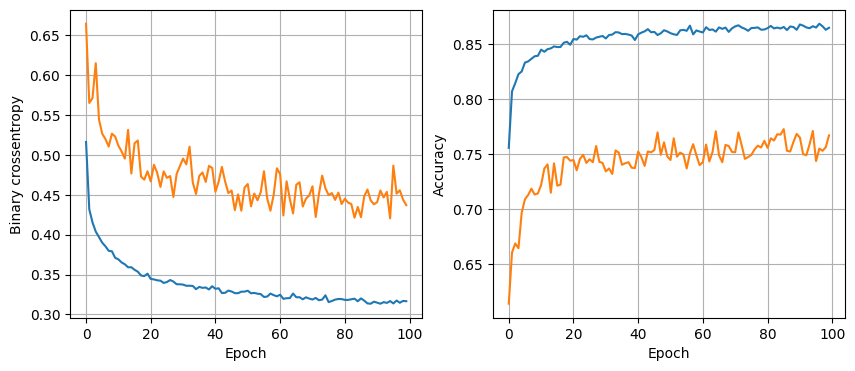

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8738
32 nodes, 0.2 dropout probability, lr 0.001, batch size 128


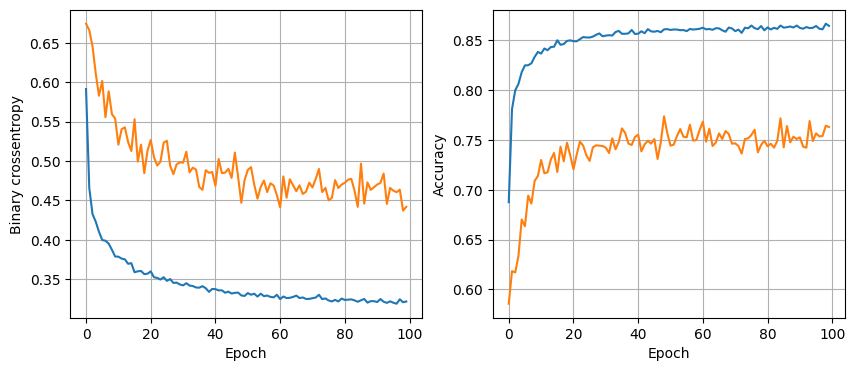

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8704
64 nodes, 0 dropout probability, lr 0.01, batch size 32


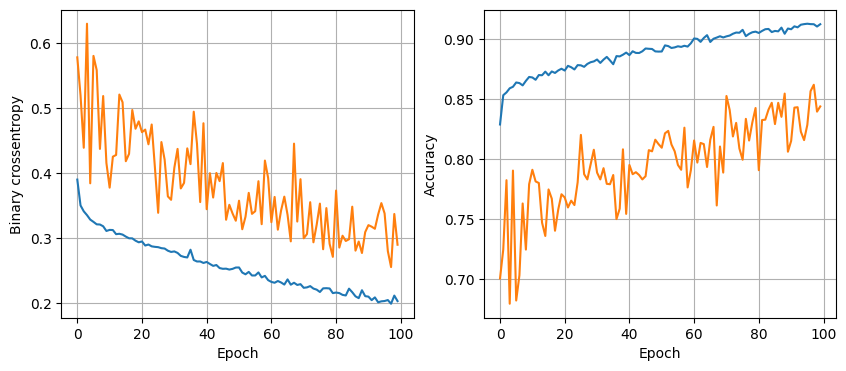

119/119 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.8541
64 nodes, 0 dropout probability, lr 0.01, batch size 64


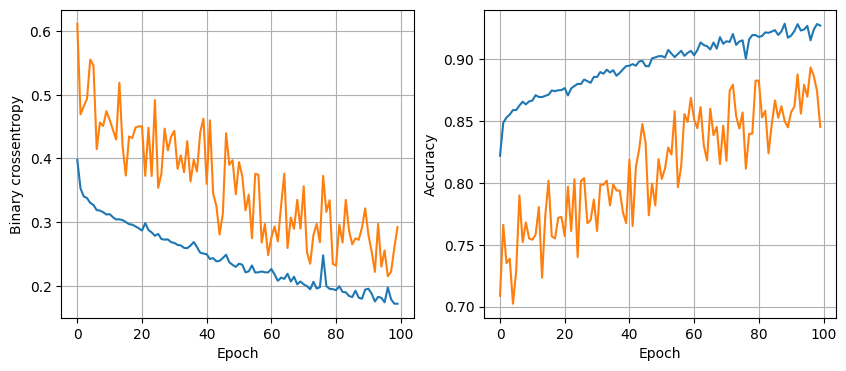

119/119 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8630
64 nodes, 0 dropout probability, lr 0.01, batch size 128


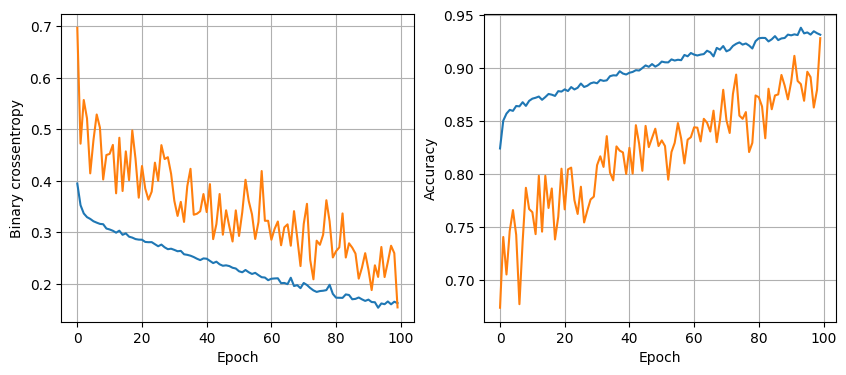

119/119 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8438
64 nodes, 0 dropout probability, lr 0.005, batch size 32


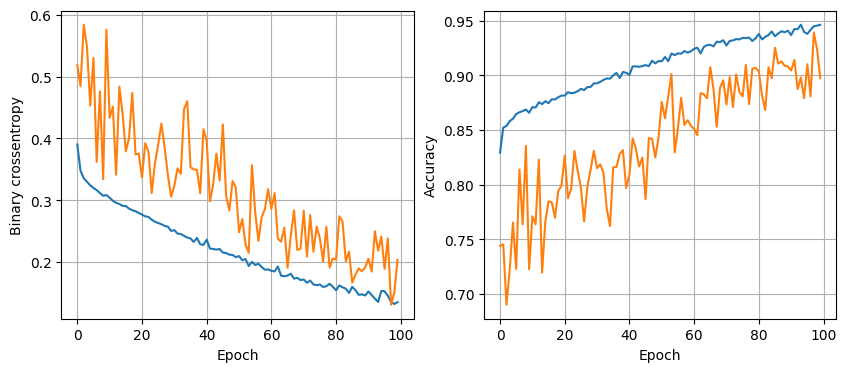

119/119 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.8512
64 nodes, 0 dropout probability, lr 0.005, batch size 64


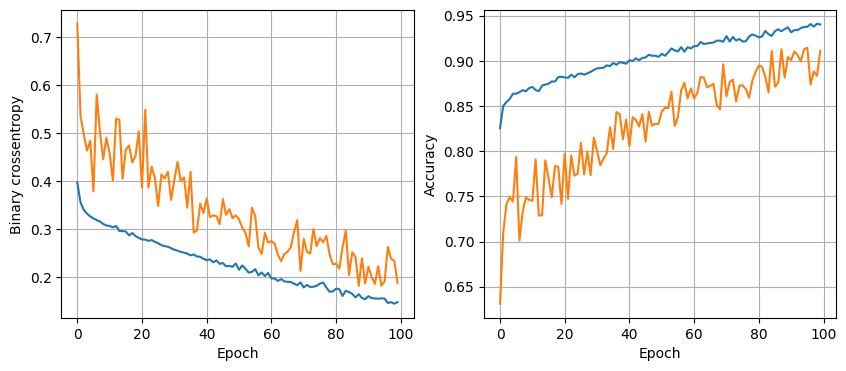

119/119 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8546
64 nodes, 0 dropout probability, lr 0.005, batch size 128


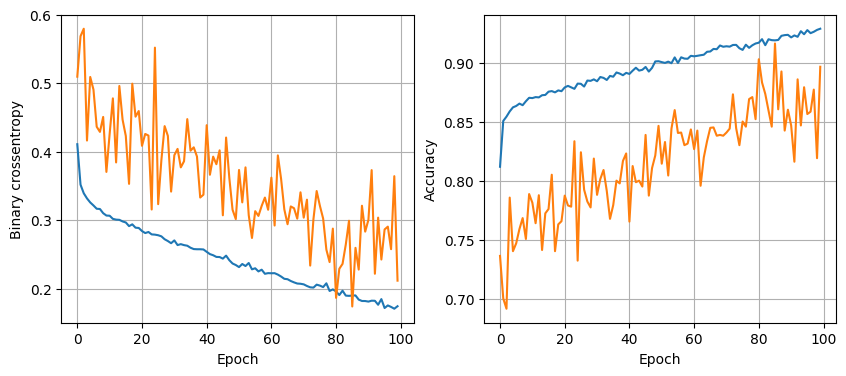

119/119 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8544
64 nodes, 0 dropout probability, lr 0.001, batch size 32


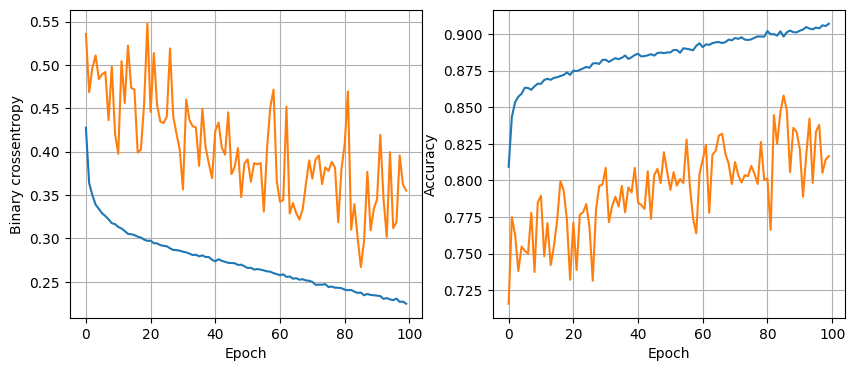

119/119 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8649
64 nodes, 0 dropout probability, lr 0.001, batch size 64


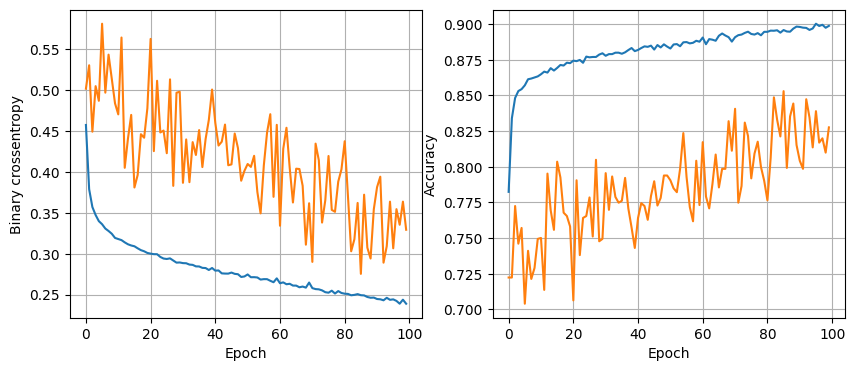

119/119 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8691
64 nodes, 0 dropout probability, lr 0.001, batch size 128


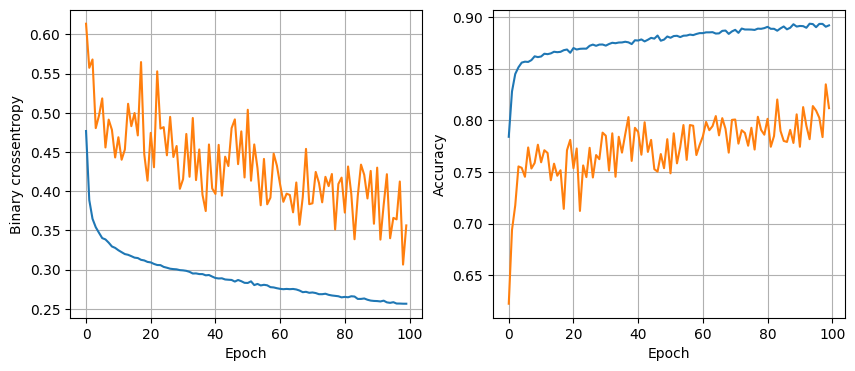

119/119 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.8670
64 nodes, 0.2 dropout probability, lr 0.01, batch size 32


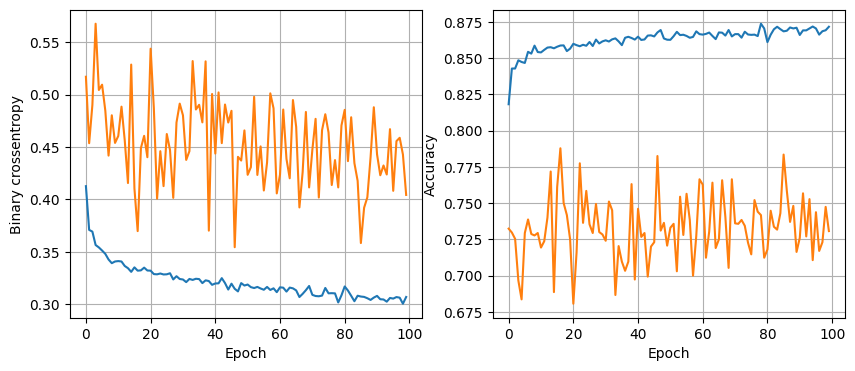

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8688
64 nodes, 0.2 dropout probability, lr 0.01, batch size 64


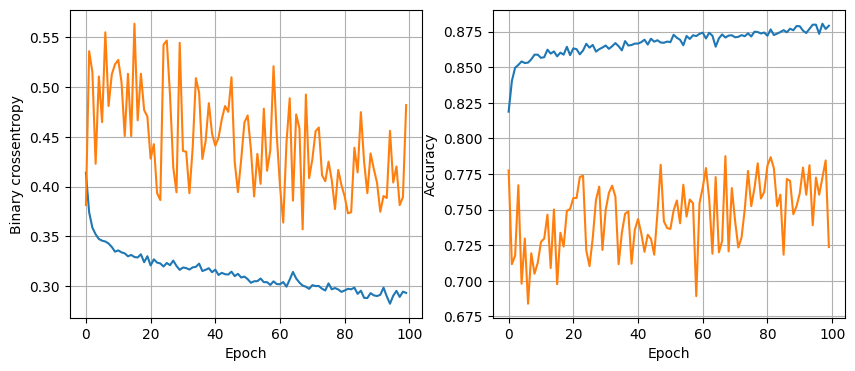

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8715
64 nodes, 0.2 dropout probability, lr 0.01, batch size 128


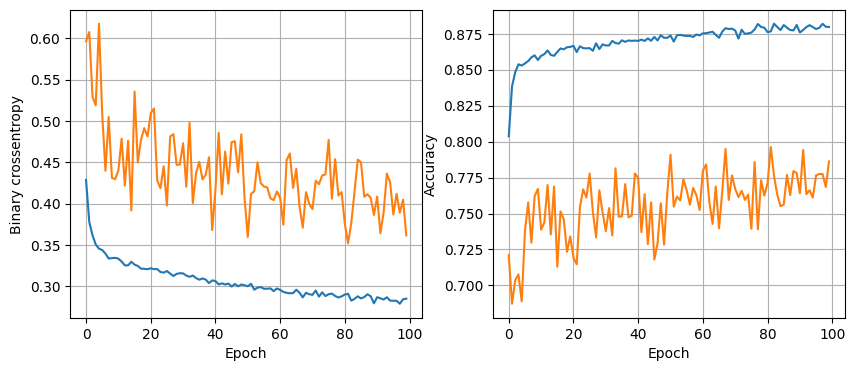

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8817
64 nodes, 0.2 dropout probability, lr 0.005, batch size 32


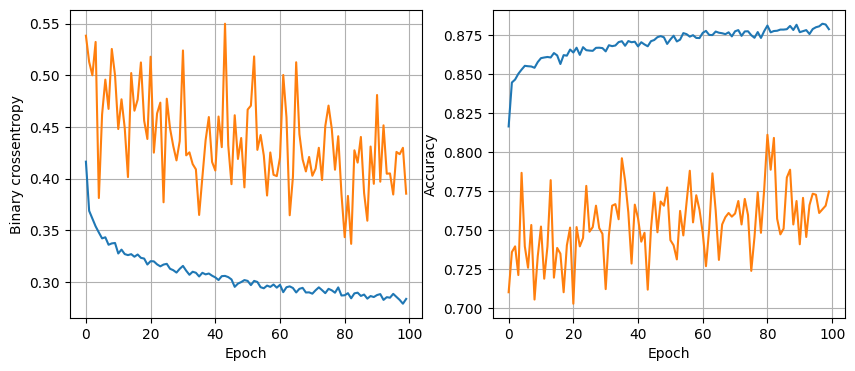

119/119 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8762
64 nodes, 0.2 dropout probability, lr 0.005, batch size 64


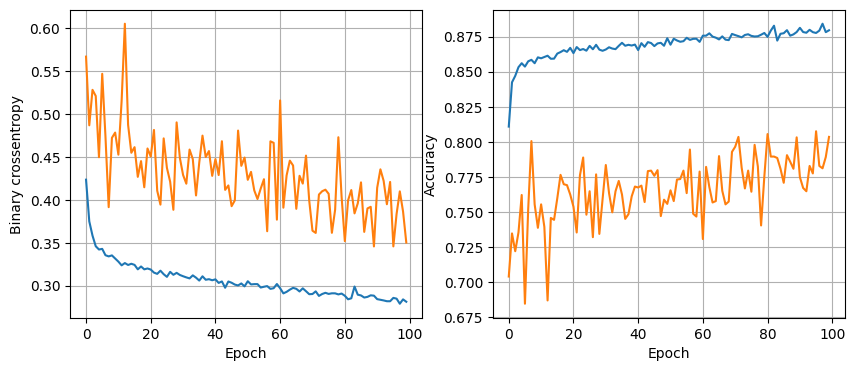

119/119 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8764
64 nodes, 0.2 dropout probability, lr 0.005, batch size 128


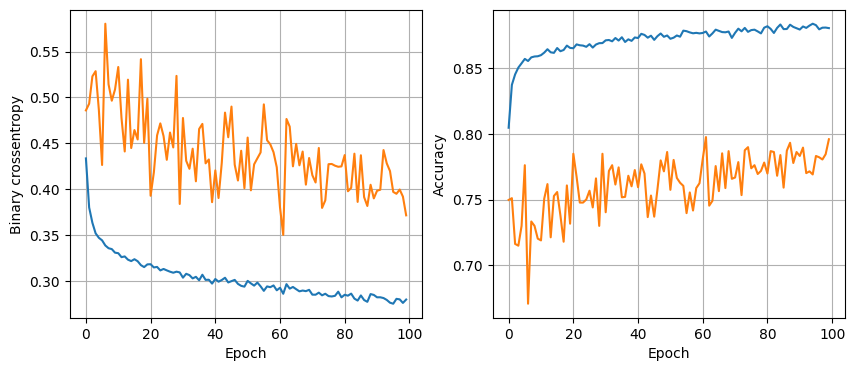

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8783
64 nodes, 0.2 dropout probability, lr 0.001, batch size 32


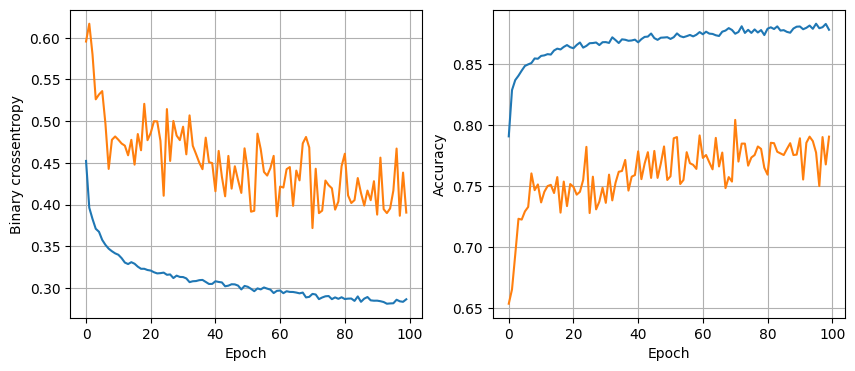

119/119 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8796
64 nodes, 0.2 dropout probability, lr 0.001, batch size 64


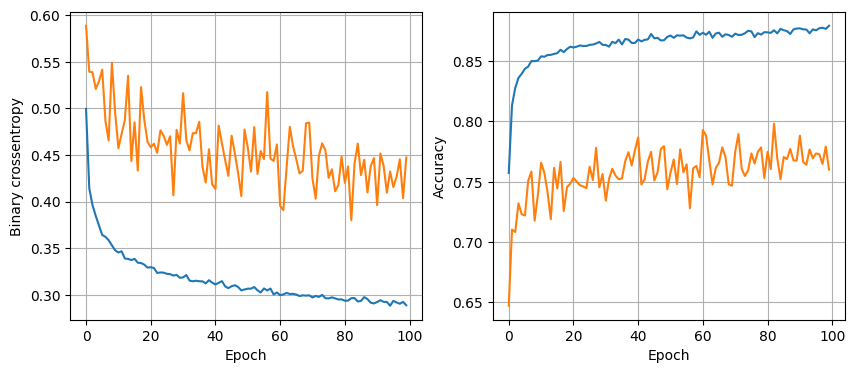

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8775
64 nodes, 0.2 dropout probability, lr 0.001, batch size 128


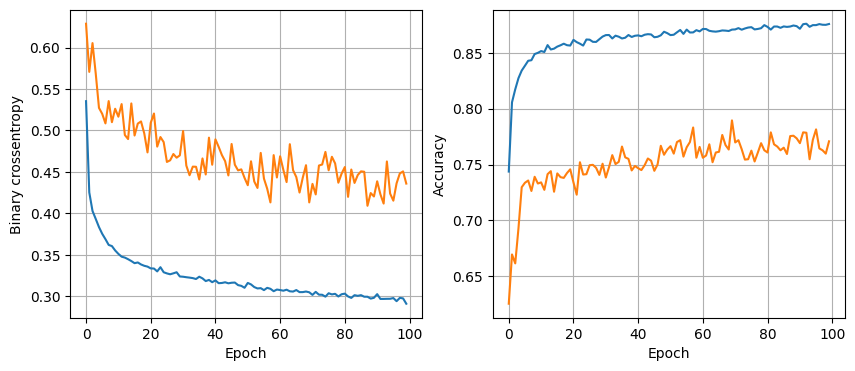

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8717


In [ ]:
epochs = 100
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for learning_rate in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout probability, lr {learning_rate}, batch size {batch_size}")
        model, history = train_model(Xtrain,ytrain,num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(Xvalid,yvalid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [ ]:
ypred = least_loss_model.predict(Xtest)
ypred = (ypred > 0.5).astype(int).reshape(-1,)
ypred

119/119 [==============================] - 0s 1ms/step


array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1374
           1       0.87      0.96      0.92      2430

    accuracy                           0.89      3804
   macro avg       0.89      0.86      0.87      3804
weighted avg       0.89      0.89      0.88      3804



0.01 more than SVM. A simple model might be more appropriate. But NN very powerful
